In [1]:
using Random, Distributions
using Plots
gr() # Plots.GRBackend()

Plots.GRBackend()

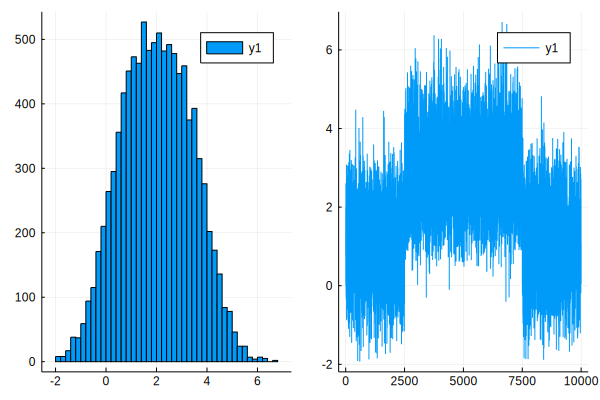

In [2]:
N = 10000

T = Int(N/2)

m_noise = 1.
noise = rand(Normal(m_noise, 1.), 2*T)
ref_noise = rand(Normal(m_noise, 1.), 2*T)

m_sig = 2.

d = .5
D = Int(d*T)

sig = zeros(D)
sig = vcat(sig, m_sig*ones(T, 1))
sig = vcat(sig, zeros(T-D))

x = sig + noise

p1 = histogram(x, nbin=75)
p2 = plot(x)
l = @layout [a b]
plot(p1, p2, layout = l)

In [3]:
A=x[1:T]
B=x[T+1:N]

5000-element Array{Float64,1}:
 3.5649532759751272 
 3.7464528692352266 
 2.595199712804966  
 2.783723998280549  
 3.8773525442349372 
 5.055262406434462  
 2.1122753726926273 
 2.939789460002471  
 3.69378687699674   
 4.539935715368723  
 2.889020709260344  
 1.3893313829566127 
 2.091459701374565  
 ⋮                  
 0.2761816790539965 
 1.288285319626915  
 2.7126888819106316 
 1.9031281011321992 
 1.7308445986567045 
 0.8203234567590878 
 2.221702950213353  
 1.3036690172952072 
 0.8472369887132295 
 0.7053922467516587 
 0.04097355817530601
 1.0981261310796941 

In [4]:
ratio(a, b) = b/(a+b)

ratio (generic function with 1 method)

In [5]:
ζ = ratio(mean(A)-mean(noise), mean(B)-mean(noise))
println(ζ)
e = ζ - d

0.510158986868425


0.01015898686842498

In [6]:
ζ = ratio(sum(A)-sum(ref_noise[1:T]), sum(B)-sum(ref_noise[T+1:N]))
println(ζ)
e = ζ - d

0.513171606930206


0.013171606930206026

In [7]:
sum(A), sum(B)

(9972.876612083372, 10176.05634945187)

In [8]:
function algo(τ, d, s, mnoise)
    # the speed of light
    c = 299792458
    # τ = 1.5e-6

    # D = .5cΔ = .5cζτ

    N = 10000
    T = Int(N/2)

    ratio(a, b) = b/(a+b)
    cmos_model(x) = .2*x + 1.0*sqrt(x) + 0.0
    # cmos_model(x) = x

    noise = rand(Normal(mnoise, 1.), 2*T)
    ref_noise = rand(Normal(mnoise, 1.), 2*T)

    # -------_______
    # 
    # ____------____
    #
    #     ^

    # d = ct/2
    # t = 2d/c
    # D = Int(floor(d*T))
    D = Int(floor(2*d/c/τ*T))

    sig = zeros(D)
    sig = vcat(sig, s*ones(T, 1))
    sig = vcat(sig, zeros(T-D))

    x = sig + noise

    # A = (x[1:T])
    # B = (x[T+1:N])
    A = cmos_model(sum(x[1:T]))
    B = cmos_model(sum(x[T+1:N]))
    nA = cmos_model(sum(ref_noise[1:T]))
    nB = cmos_model(sum(ref_noise[T+1:N]))

    # ζ = ratio(mean(A)-mean(noise), mean(B)-mean(noise))
    # ζ = ratio(sA-sum(ref_noise[1:T]), sB-sum(ref_noise[T+1:N]))
    ζ = ratio(A-nA, B-nB)
    d = .5c*ζ*τ
end

algo (generic function with 1 method)

In [9]:
N = 10000
T = Int(N/2)
c = 299792458
τ = 1.5e-6
println(c*τ/2)
d=150
t = 2*d/c
println(t)
t/τ*T

224.8443435
1.000692285594456e-6


3335.64095198152

In [10]:
algo(1.5e-6, 5, 1,1)

0.3059686652806386

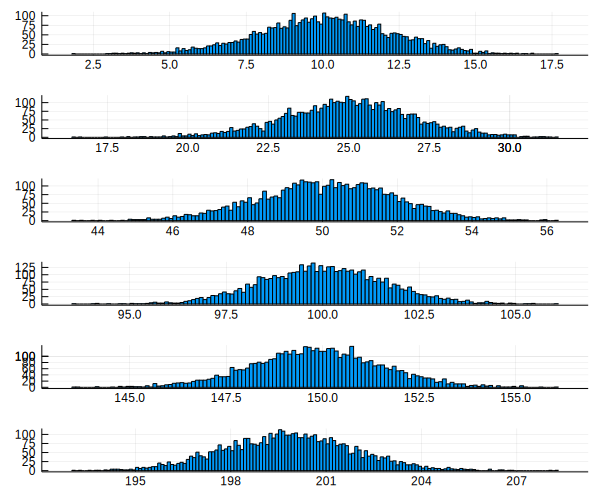

In [11]:
e = [[algo(1.5e-6,d,2.,1.) for n=1:5000] for d in [10.,25.,50.,100.,150.,200.]]
histogram(e, nbin=200, layout = (6,1), legend = false, size=(600,500))

In [12]:
e = [[algo(.75e-6,d,3,1) for n=1:10000] for d in [10.,25.,50.,100.]]

4-element Array{Array{Float64,1},1}:
 [9.91322152300355, 9.599829712597025, 10.743131722875807, 9.736580361672793, 9.219605810939944, 10.013300483568946, 9.905132360695303, 10.421950795677269, 9.466266488888534, 8.209554014075941  …  9.958323796367331, 11.064847028403136, 9.499796415407566, 10.223501842092947, 9.51032485578006, 9.901255957815788, 11.143558375774422, 9.654709499921617, 10.315836959865958, 10.045447176768382]    
 [26.235055987872876, 25.51697895837449, 24.83968216732357, 25.263628158026815, 25.398338497511244, 24.738595359522744, 24.37689028557197, 25.364030488948302, 25.077673930160294, 24.983146757090832  …  25.292251330395917, 24.66302536379811, 25.88336556792554, 25.5775038907419, 24.92106656603864, 24.778296017643566, 24.918087966591585, 24.358946187917034, 24.27176334666443, 25.26835192950848]
 [50.04023428957919, 49.45046931379152, 50.05871325443831, 50.57882321633523, 49.98309372502832, 49.32675782211751, 50.17013429916872, 49.42173807865443, 49.65628562021527, 

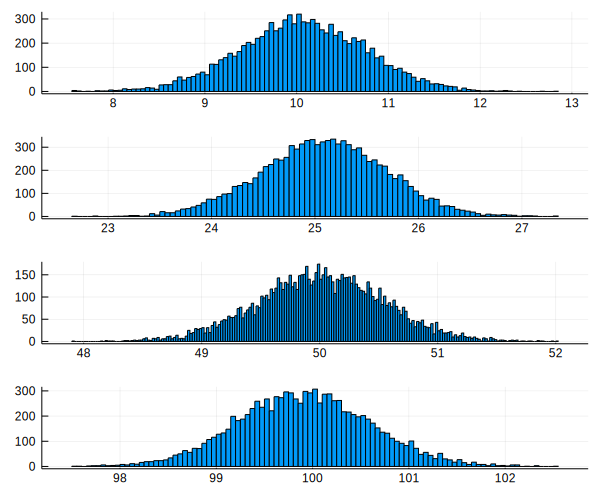

In [13]:
histogram(e, nbin=200, layout = (4,1), legend = false, size=(600,500))

In [14]:
e = [[algo(1.5e-6,d,3,1) for n=1:10000] for d in [10.,25.,50.,100.,150.,200.]]

6-element Array{Array{Float64,1},1}:
 [8.601726282482556, 11.559881908508142, 10.568122514205722, 11.799044053097711, 10.385593593258784, 10.828770883563449, 10.404820006774317, 12.312277680357019, 9.025367931676977, 8.429099959575964  …  9.947176261459557, 12.679155305303484, 6.150192834954736, 9.633032077689618, 10.202133830237313, 8.272236504529378, 12.630024646115402, 10.866759749884734, 8.973435377004966, 12.23060097466279]  
 [26.003580906463483, 24.805923942896595, 25.352139435131708, 26.583500904763834, 23.963426085053253, 25.41096801624762, 26.444352419620827, 26.5866313831411, 21.06596668640455, 26.52465829935698  …  23.337892558107452, 23.910957431517847, 23.297982793139802, 23.926747410774386, 24.91218734284289, 28.256897496744084, 26.989478927147527, 26.44793297321324, 24.659928168809532, 23.913518954791428]
 [49.568412364768406, 52.324997988455436, 50.72735217200352, 50.45344700023159, 51.2076131792682, 48.48043833609766, 48.766738425587434, 50.4592977536913, 50.271645696

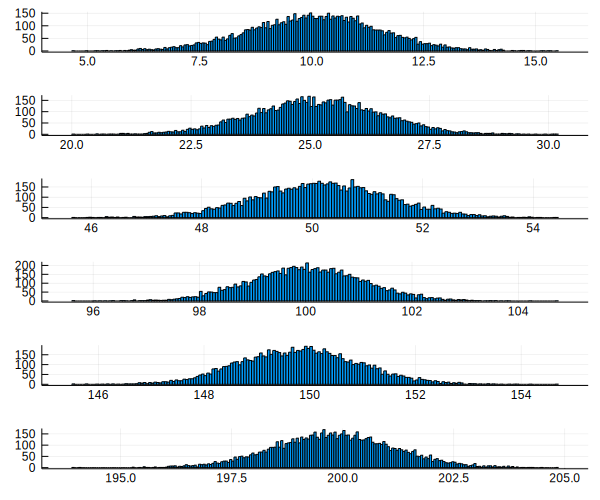

In [15]:
histogram(e, nbin=200, layout = (6,1), legend = false, size=(600,500))

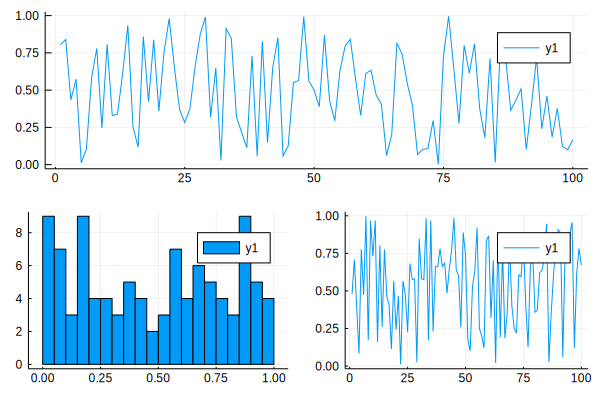

In [17]:
gr()
l = @layout [a ; b c]
p1 = plot(rand(100))
p2 = histogram(rand(100), nbin=20)
p3 = plot(rand(100))
plot(p1, p2, p3, layout = l)

In [19]:
x = rand(Normal(1, 1.), 1000);

In [20]:
fit(Normal, x)

Normal{Float64}(μ=1.0519666802589227, σ=0.9769712763868161)

In [21]:
x1 = rand(Normal(1, 1.), 10000);
x2 = rand(Normal(1, 1.), 10000);
x = x1 + x2
fit(Normal, x)

Normal{Float64}(μ=1.9942823941458625, σ=1.436874298190987)

In [93]:
y = rand(Normal(1, 1.), 10000);
fit(Normal,y)

x = zeros(10000)
for i in 1:1:1000
    x = x + rand(Normal(1, 1.), 10000);
end
x = x
fit(Normal,x)

Normal{Float64}(μ=1000.0463337213263, σ=31.810885854162944)

In [94]:
fit(Normal,x)

Normal{Float64}(μ=1000.0463337213263, σ=31.810885854162944)